# Task
Analyze the time series data from the dataset, by loading it, converting the 'Date' column to datetime and setting it as the index, and selecting an appropriate column for analysis. Then, plot the time series, decompose it into trend, seasonality, and residuals, and plot these components. Apply moving average smoothing with a suitable window size, plot the smoothed series alongside the original, and finally, summarize the identified trends, seasonality, and the impact of moving average smoothing.

## Load Data and Preprocess

Load the dataset into a pandas DataFrame. Convert the 'Date' column to datetime objects and set it as the DataFrame index. Identify the appropriate column for time-series analysis (e.g., 'Close' or 'Adj Close').


In [1]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/yahoo_stock.csv')

# Convert the 'Date' column to datetime objects and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the first few rows and information about the DataFrame
print("DataFrame Head:")
print(df.head())
print("\nDataFrame Info:")
df.info()

DataFrame Head:
                   High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2015-11-23 to 2020-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1825

For time-series analysis, the 'Adj Close' column will be used as it provides the closing price adjusted for corporate actions like dividends and stock splits, offering a more accurate representation of the stock's value over time.

## Plot Time Series Data

Generate a plot of the selected time-series data to visualize its patterns, trends, and any initial seasonality. Ensure the plot has appropriate labels and a legend.


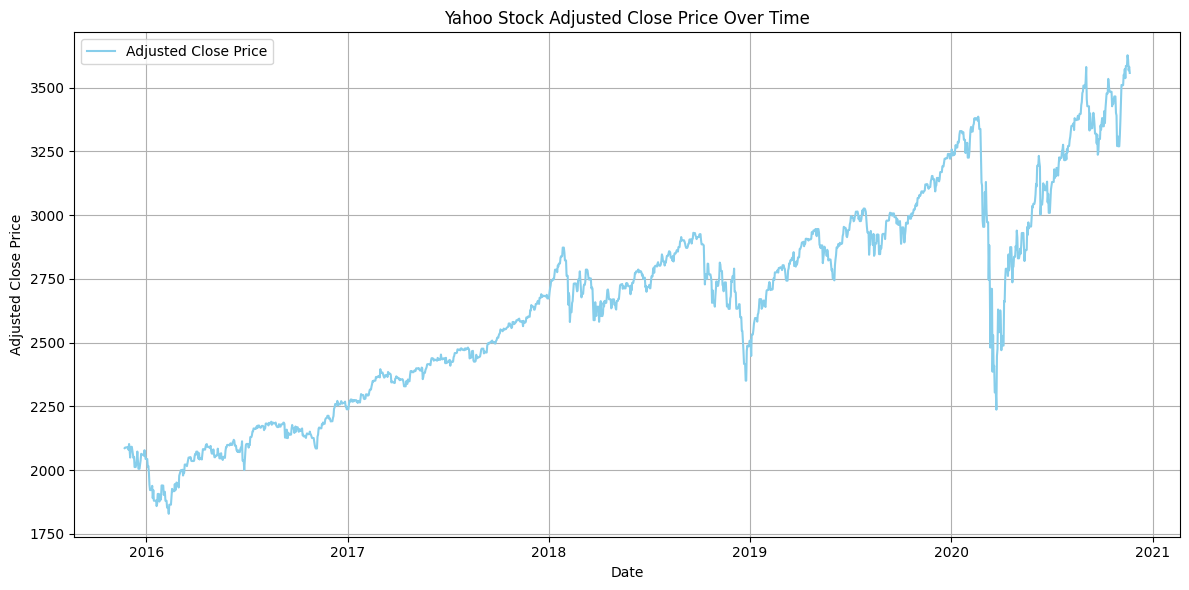

In [2]:
import matplotlib.pyplot as plt

# Select the 'Adj Close' column for time-series analysis
ts_data = df['Adj Close']

# Create a line plot of the selected time series
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Adjusted Close Price', color='skyblue')

# Label the x-axis as 'Date' and the y-axis as 'Adjusted Close Price'
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')

# Add a title to the plot
plt.title('Yahoo Stock Adjusted Close Price Over Time')

# Add a legend for clarity
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Decompose Time Series 

Decompose the time series into trend, seasonality, and residuals using the seasonal_decompose function from `statsmodels`. Specify an appropriate model (additive or multiplicative) and period based on initial observations or common practices for stock data.


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Choose an appropriate decomposition model and period
# For stock data, an additive model is often suitable for a first pass
# A period of 5 is chosen to capture weekly seasonality (5 trading days)
model_type = 'additive'
period_val = 5

# Apply seasonal_decompose to the ts_data Series
decomposition = seasonal_decompose(ts_data, model=model_type, period=period_val)

# Print the trend, seasonal, and resid components
print("\nTrend Component Head:")
print(decomposition.trend.head())

print("\nSeasonal Component Head:")
print(decomposition.seasonal.head())

print("\nResidual Component Head:")
print(decomposition.resid.head())


Trend Component Head:
Date
2015-11-23            NaN
2015-11-24            NaN
2015-11-25    2088.716064
2015-11-26    2089.420068
2015-11-27    2089.614111
Name: trend, dtype: float64

Seasonal Component Head:
Date
2015-11-23    0.507897
2015-11-24   -1.362599
2015-11-25   -1.664037
2015-11-26   -0.134685
2015-11-27    2.653424
Name: seasonal, dtype: float64

Residual Component Head:
Date
2015-11-23         NaN
2015-11-24         NaN
2015-11-25    1.818090
2015-11-26   -0.415266
2015-11-27   -2.157428
Name: resid, dtype: float64


To visualize the decomposed components, I will plot the original time series along with its trend, seasonal, and residual components using `matplotlib.pyplot`.



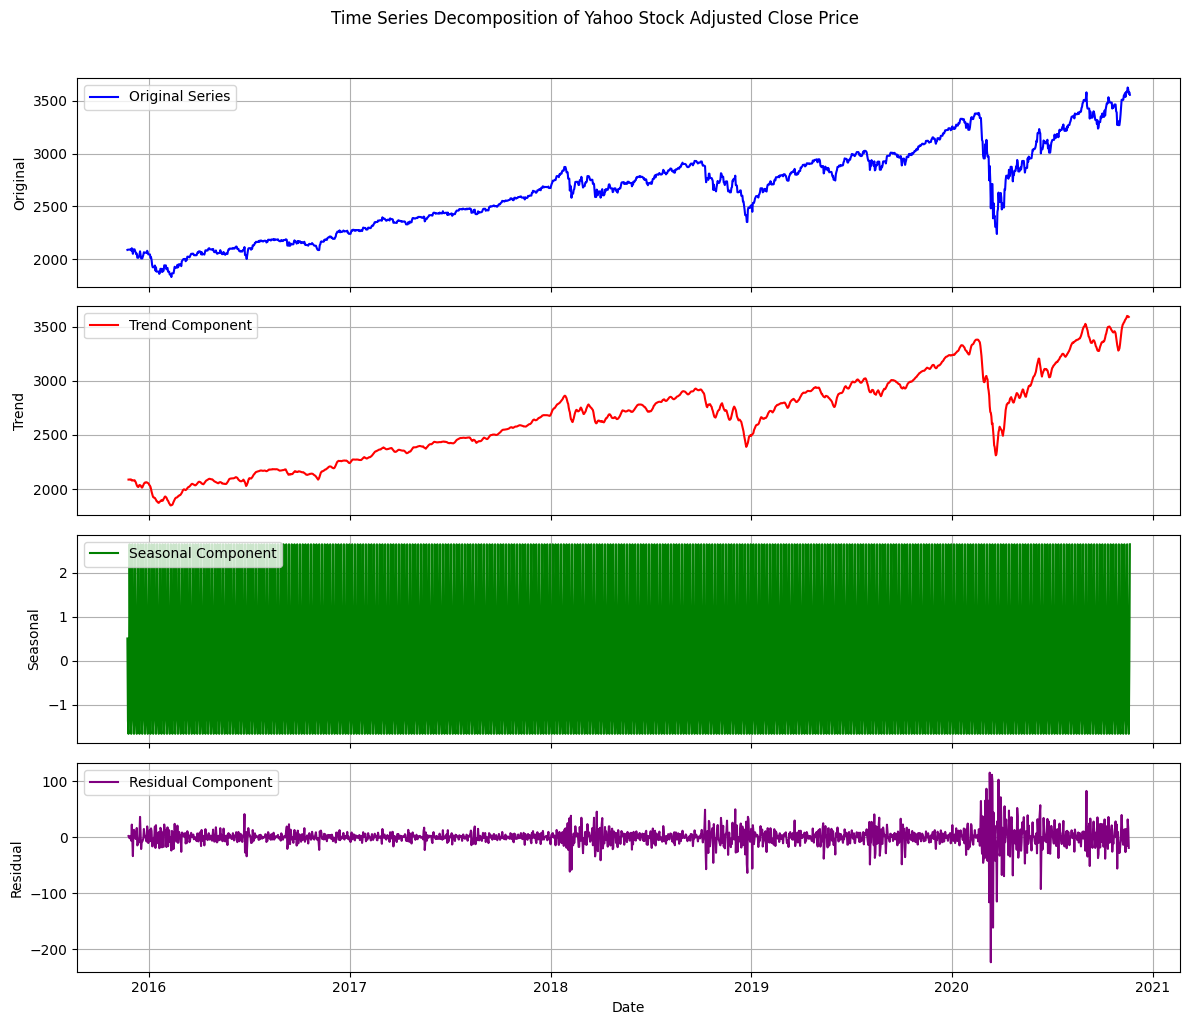

In [4]:
import matplotlib.pyplot as plt

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

ax1.plot(ts_data, label='Original Series', color='blue')
ax1.set_ylabel('Original')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2.plot(decomposition.trend, label='Trend Component', color='red')
ax2.set_ylabel('Trend')
ax2.legend(loc='upper left')
ax2.grid(True)

ax3.plot(decomposition.seasonal, label='Seasonal Component', color='green')
ax3.set_ylabel('Seasonal')
ax3.legend(loc='upper left')
ax3.grid(True)

ax4.plot(decomposition.resid, label='Residual Component', color='purple')
ax4.set_ylabel('Residual')
ax4.legend(loc='upper left')
ax4.grid(True)

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition of Yahoo Stock Adjusted Close Price', y=1.02)
plt.tight_layout()
plt.show()

## Perform Moving Average Smoothing

Apply a moving average smoothing technique to the time series. Experiment with a suitable window size (e.g., 7-day, 30-day, or 90-day for daily stock data) to smooth out short-term fluctuations and highlight longer-term trends.


To perform moving average smoothing, I will select a window size of 30 days to observe monthly trends, apply the `.rolling()` method with this window to the `ts_data` Series, and then calculate the mean to get the smoothed data, storing it in a new variable.



In [5]:
import pandas as pd

# Choose a suitable window size for the moving average (e.g., 30 for monthly trends in daily data)
window_size = 30

# Calculate the moving average of the ts_data Series
smoothed_data = ts_data.rolling(window=window_size).mean()

# Display the head of the smoothed data
print(f"Smoothed Data (Window Size: {window_size}) Head:")
print(smoothed_data.head())


Smoothed Data (Window Size: 30) Head:
Date
2015-11-23   NaN
2015-11-24   NaN
2015-11-25   NaN
2015-11-26   NaN
2015-11-27   NaN
Name: Adj Close, dtype: float64


To visualize the effect of smoothing, I will plot the original time series data and the newly calculated smoothed data on the same chart, ensuring proper labels and title for clarity.


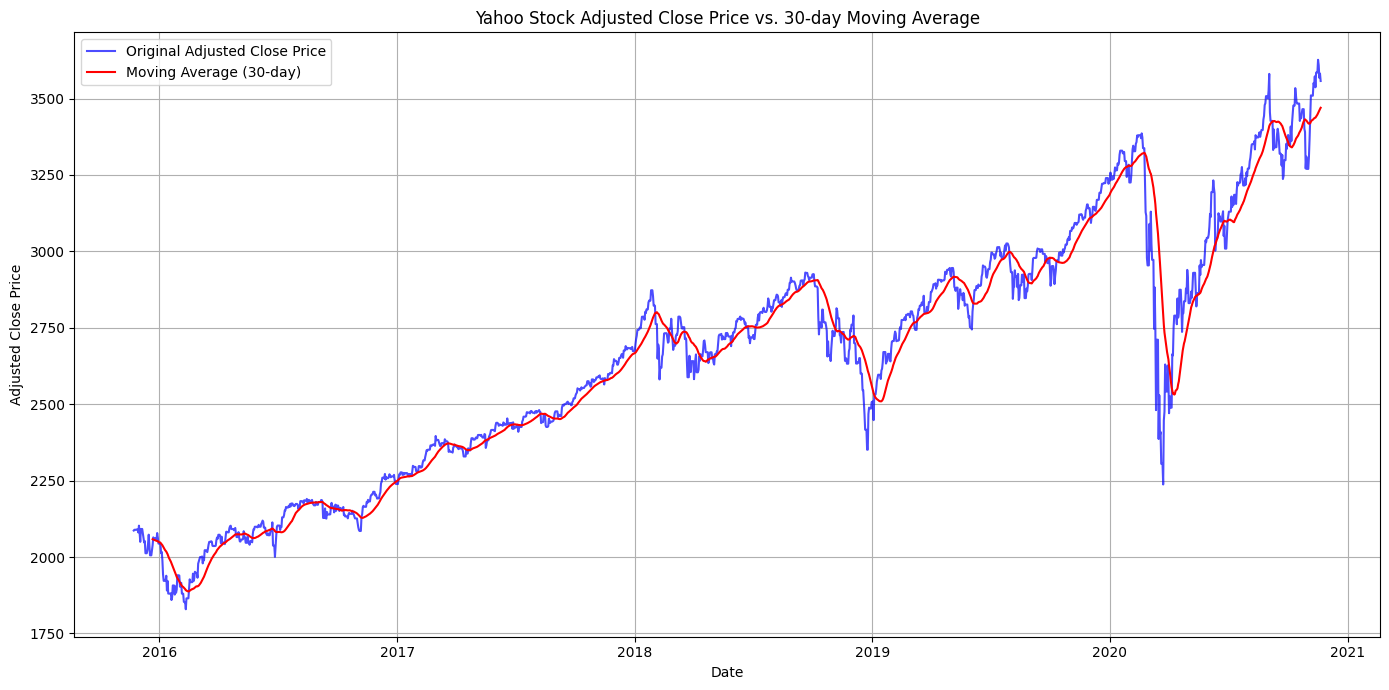

In [6]:
import matplotlib.pyplot as plt

# Plot the original time series and the smoothed time series
plt.figure(figsize=(14, 7))
plt.plot(ts_data, label='Original Adjusted Close Price', color='blue', alpha=0.7)
plt.plot(smoothed_data, label=f'Moving Average ({window_size}-day)', color='red')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title(f'Yahoo Stock Adjusted Close Price vs. {window_size}-day Moving Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Summary of Moving Average Smoothing

The moving average smoothing with a `window_size` of 30 days clearly shows a general **upward trend** in the Yahoo stock's adjusted close price over the observed period. The smoothed line effectively filters out the short-term noise and fluctuations present in the original time series, making the underlying trend more visible.

While the decomposition revealed some **weekly seasonality** (with a period of 5 days), the 30-day moving average is primarily designed to highlight longer-term trends, and its primary impact here is **reducing volatility** and providing a clearer view of the sustained direction of the stock price, rather than emphasizing daily or weekly patterns. The smoothed data offers a more stable representation of the stock's performance, which can be useful for identifying long-term investment patterns or macroeconomic influences.

Summarize the identified trends, seasonality, and the impact of moving average smoothing on the time-series data, providing insights gained from the analysis.